In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 9.8 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import os
from roboflow import Roboflow
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = YOLO("yolov5m.pt")

PRO TIP 💡 Replace 'model=yolov5m.pt' with new 'model=yolov5mu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 48.2M/48.2M [00:00<00:00, 116MB/s]


In [ ]:
rf = Roboflow(api_key="fUtTYMDMJUYdsKJ9g5h0")
project = rf.workspace().project("wall-crack-texture")
dataset = project.version("1").download("yolov5pytorch")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Wall-Crack-Texture-1 in yolov5pytorch:: 100%|██████████| 1807/1807 [00:00<00:00, 6206.09it/s]


In [ ]:
# Membaca dan memperbaiki file YAML
import yaml

data_yaml_path = "/content/Wall-Crack-Texture-1/data.yaml"

# Membaca file YAML
with open(data_yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Memperbaiki jalur gambar jika perlu
data['train'] = '/content/Wall-Crack-Texture-1/train/images'
data['val'] = '/content/Wall-Crack-Texture-1/valid/images'
data['test'] = '/content/Wall-Crack-Texture-1/test/images'

# Menyimpan file YAML yang telah diperbarui
with open(data_yaml_path, 'w') as f:
    yaml.dump(data, f)

print("File YAML telah diperbarui.")


File YAML telah diperbarui.


In [ ]:
train_results = model.train(
    data="/content/Wall-Crack-Texture-1/data.yaml",
    epochs=50,
    imgsz=640,
    project="/content/drive/MyDrive/Deep Learning/trainv5",
    name="modeltv5"
)

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5m.pt, data=/content/Wall-Crack-Texture-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Deep Learning/trainv5, name=modeltv5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

train: Scanning /content/Wall-Crack-Texture-1/train/labels.cache... 629 images, 3 backgrounds, 0 corrupt: 100%|██████████| 629/629 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Wall-Crack-Texture-1/valid/labels.cache... 180 images, 0 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Deep Learning/trainv5/modeltv5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Deep Learning/trainv5/modeltv5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.97G      1.854      2.556      2.066          9        640: 100%|██████████| 40/40 [00:22<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        180        225     0.0737      0.182     0.0264    0.00579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.16G       1.99      2.581      2.221         11        640: 100%|██████████| 40/40 [00:20<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]

                   all        180        225     0.0924      0.206     0.0676     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       7.4G      2.043      2.648      2.244         15        640: 100%|██████████| 40/40 [00:21<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all        180        225      0.168       0.13     0.0739      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.41G      2.041      2.575      2.218         13        640: 100%|██████████| 40/40 [00:21<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all        180        225     0.0488      0.158     0.0282     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.41G      1.974      2.513      2.179         12        640: 100%|██████████| 40/40 [00:20<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        180        225      0.112      0.181     0.0733     0.0288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       7.4G      1.914      2.457      2.156         17        640: 100%|██████████| 40/40 [00:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        180        225      0.229       0.33      0.133     0.0722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.24G      1.914      2.403      2.115          9        640: 100%|██████████| 40/40 [00:20<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]

                   all        180        225      0.179      0.198     0.0561     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.39G      1.875      2.408      2.066         11        640: 100%|██████████| 40/40 [00:21<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]

                   all        180        225      0.368      0.267      0.257      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.41G      1.889       2.43      2.103         11        640: 100%|██████████| 40/40 [00:21<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        180        225      0.905      0.158      0.219     0.0952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.26G      1.811      2.261      2.046         17        640: 100%|██████████| 40/40 [00:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        180        225      0.389      0.354      0.258      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.23G      1.812      2.243      2.026         12        640: 100%|██████████| 40/40 [00:21<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        180        225      0.247      0.355      0.251      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.25G      1.776      2.285      2.026         11        640: 100%|██████████| 40/40 [00:21<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]

                   all        180        225      0.379      0.315      0.291      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.25G      1.759       2.22      1.992         16        640: 100%|██████████| 40/40 [00:22<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        180        225      0.284      0.413      0.351      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       7.4G      1.765      2.242      1.994         10        640: 100%|██████████| 40/40 [00:21<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

                   all        180        225      0.252      0.384      0.315      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.25G      1.695      2.194      1.935         12        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        180        225      0.353      0.345      0.316      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.39G      1.754      2.146      1.974         10        640: 100%|██████████| 40/40 [00:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        180        225      0.386      0.343      0.311      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.23G      1.781      2.161      1.992         14        640: 100%|██████████| 40/40 [00:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        180        225      0.302      0.387      0.288      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.24G      1.705      2.166      1.922         16        640: 100%|██████████| 40/40 [00:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        180        225      0.667      0.305      0.312      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       7.4G      1.698      2.096      1.915         19        640: 100%|██████████| 40/40 [00:20<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]

                   all        180        225      0.768      0.359      0.405      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.24G       1.66      2.051      1.891         10        640: 100%|██████████| 40/40 [00:21<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]

                   all        180        225      0.383      0.434      0.393      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.25G      1.669      2.117      1.908         12        640: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]

                   all        180        225      0.336       0.44      0.363       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.41G      1.692      2.115      1.886         13        640: 100%|██████████| 40/40 [00:20<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        180        225      0.573      0.411      0.438      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.25G       1.66      2.019      1.907         14        640: 100%|██████████| 40/40 [00:20<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        180        225      0.573      0.425      0.458      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.25G        1.6      2.016      1.838         15        640: 100%|██████████| 40/40 [00:21<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        180        225      0.433      0.436      0.421      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.39G      1.614      2.017      1.858          8        640: 100%|██████████| 40/40 [00:21<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        180        225      0.493      0.377      0.405      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.24G       1.59       1.95      1.815         11        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]

                   all        180        225      0.356      0.424      0.387       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.39G      1.584      1.973      1.827         15        640: 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]

                   all        180        225      0.416      0.438      0.416      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       7.4G      1.625      2.023      1.857         10        640: 100%|██████████| 40/40 [00:20<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        180        225      0.406      0.467      0.419      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.24G      1.595      1.924      1.832         15        640: 100%|██████████| 40/40 [00:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        180        225      0.471      0.448      0.441       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.39G      1.622       1.96      1.848         15        640: 100%|██████████| 40/40 [00:20<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        180        225      0.434      0.514      0.458      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.25G      1.603       1.94      1.818         16        640: 100%|██████████| 40/40 [00:21<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        180        225      0.419      0.475      0.442      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.41G       1.57      1.897      1.798         12        640: 100%|██████████| 40/40 [00:20<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]

                   all        180        225      0.549      0.472      0.462      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.25G      1.531      1.862      1.791         10        640: 100%|██████████| 40/40 [00:20<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]

                   all        180        225      0.432      0.511      0.482      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.24G      1.539      1.864      1.784          9        640: 100%|██████████| 40/40 [00:20<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        180        225      0.473      0.453      0.466      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       7.4G      1.525      1.876      1.792         11        640: 100%|██████████| 40/40 [00:19<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        180        225       0.43      0.448      0.447      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.24G      1.532      1.845      1.777         14        640: 100%|██████████| 40/40 [00:19<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        180        225      0.574      0.491      0.511      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.41G      1.512      1.835      1.758         18        640: 100%|██████████| 40/40 [00:21<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        180        225      0.471      0.447      0.483      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.25G      1.522      1.816      1.765         16        640: 100%|██████████| 40/40 [00:21<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]

                   all        180        225      0.508      0.457       0.47      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.39G      1.509      1.793      1.765         13        640: 100%|██████████| 40/40 [00:20<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        180        225      0.444      0.478      0.453      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.39G       1.47      1.779      1.747         13        640: 100%|██████████| 40/40 [00:20<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        180        225      0.451      0.493      0.485      0.236


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.23G      1.647      1.909      2.068          6        640: 100%|██████████| 40/40 [00:21<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        180        225      0.531      0.457      0.458      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.39G      1.593      1.752      2.022          5        640: 100%|██████████| 40/40 [00:20<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]

                   all        180        225      0.578      0.455      0.524      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.39G      1.569      1.694       1.97          8        640: 100%|██████████| 40/40 [00:21<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]

                   all        180        225       0.43       0.53      0.485      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.26G      1.541      1.638      1.964          7        640: 100%|██████████| 40/40 [00:20<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        180        225      0.496      0.519      0.505      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.24G        1.5      1.596      1.924          6        640: 100%|██████████| 40/40 [00:19<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        180        225      0.501      0.478      0.501      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.39G      1.544      1.558      1.972          6        640: 100%|██████████| 40/40 [00:19<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]

                   all        180        225      0.527      0.484      0.514      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       7.4G      1.515      1.556      1.923          6        640: 100%|██████████| 40/40 [00:20<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        180        225       0.57      0.511      0.548      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       7.4G      1.485      1.505      1.908          8        640: 100%|██████████| 40/40 [00:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all        180        225      0.525      0.535      0.547      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.23G      1.457      1.508      1.894          5        640: 100%|██████████| 40/40 [00:21<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        180        225      0.526      0.546      0.558      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.24G      1.458      1.495      1.909          5        640: 100%|██████████| 40/40 [00:20<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        180        225      0.575      0.527      0.558      0.284



50 epochs completed in 0.359 hours.
Optimizer stripped from /content/drive/MyDrive/Deep Learning/trainv5/modeltv5/weights/last.pt, 50.5MB
Optimizer stripped from /content/drive/MyDrive/Deep Learning/trainv5/modeltv5/weights/best.pt, 50.5MB

Validating /content/drive/MyDrive/Deep Learning/trainv5/modeltv5/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5m summary (fused): 248 layers, 25,046,953 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]


                   all        180        225      0.525      0.543      0.557      0.287
           large_crack         62         66      0.545      0.672      0.675      0.294
              no_crack         63         74      0.607      0.716      0.734      0.462
           small_crack         57         85      0.422      0.241      0.263      0.105
Speed: 0.4ms preprocess, 9.1ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to /content/drive/MyDrive/Deep Learning/trainv5/modeltv5


In [ ]:
import pandas as pd
results = pd.read_csv("/content/drive/MyDrive/Deep Learning/trainv5/modeltv5/results.csv")
print(results.columns)

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


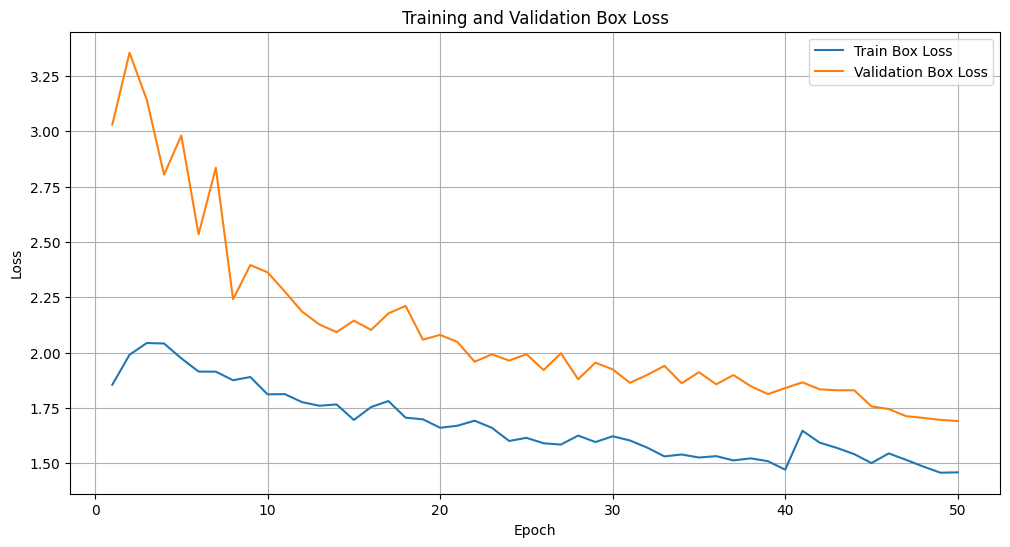

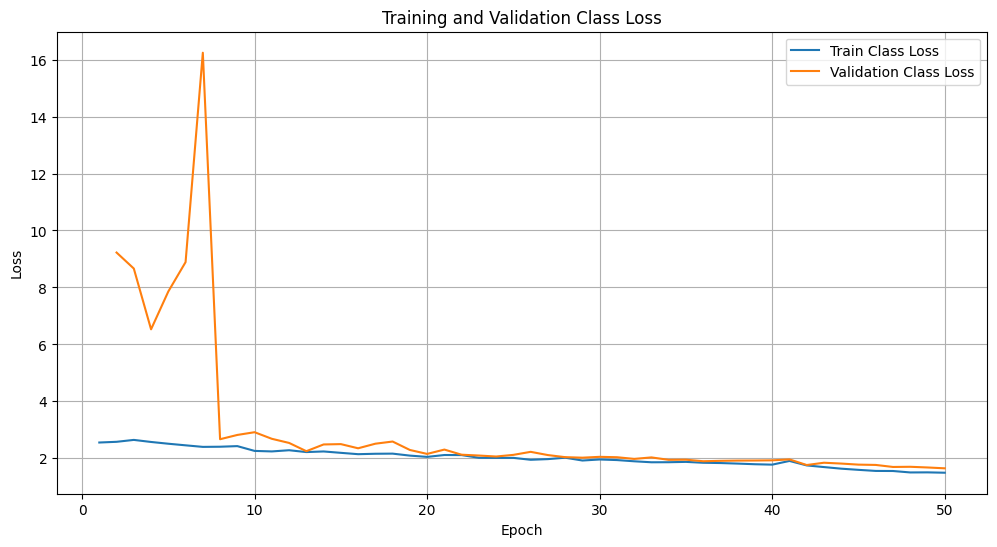

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss')
plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Box Loss')
plt.legend()
plt.grid()

plt.figure(figsize=(12, 6))
plt.plot(results['epoch'], results['train/cls_loss'], label='Train Class Loss')
plt.plot(results['epoch'], results['val/cls_loss'], label='Validation Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Class Loss')
plt.legend()
plt.grid()

plt.show()

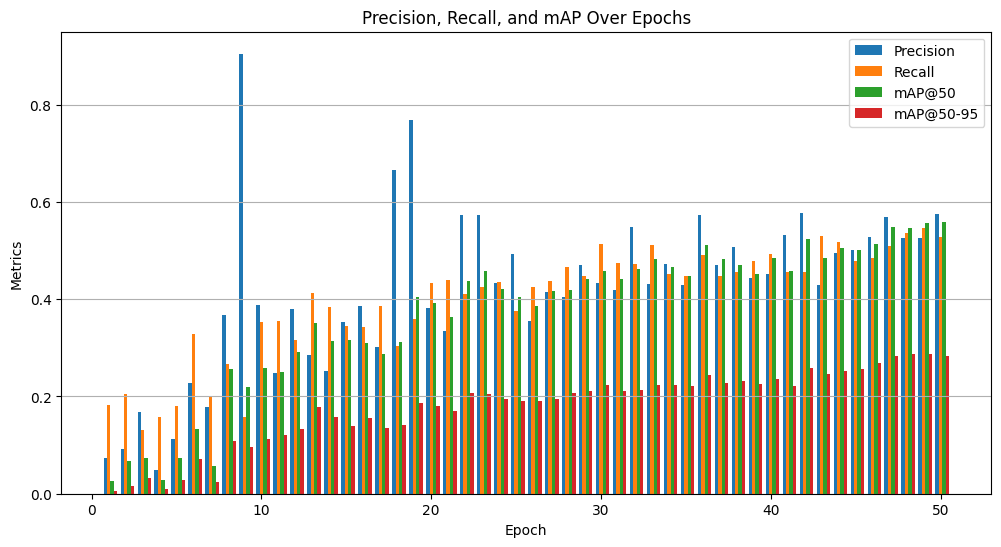

In [ ]:
# Membuat figure dan set ukuran grafik
plt.figure(figsize=(12, 6))

# Membuat grafik batang untuk setiap metrik pada setiap epoch
# Perhatikan bahwa 'epoch' digunakan sebagai posisi x pada grafik batang

# Grafik batang untuk Precision
plt.bar(results['epoch'] - 0.2, results['metrics/precision(B)'], width=0.2, label='Precision', align='center')

# Grafik batang untuk Recall
plt.bar(results['epoch'], results['metrics/recall(B)'], width=0.2, label='Recall', align='center')

# Grafik batang untuk mAP@50
plt.bar(results['epoch'] + 0.2, results['metrics/mAP50(B)'], width=0.2, label='mAP@50', align='center')

# Grafik batang untuk mAP@50-95
plt.bar(results['epoch'] + 0.4, results['metrics/mAP50-95(B)'], width=0.2, label='mAP@50-95', align='center')

# Label dan title untuk grafik
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Precision, Recall, and mAP Over Epochs')

# Menambahkan legend dan grid
plt.legend()
plt.grid(axis='y')

# Menampilkan grafik
plt.show()


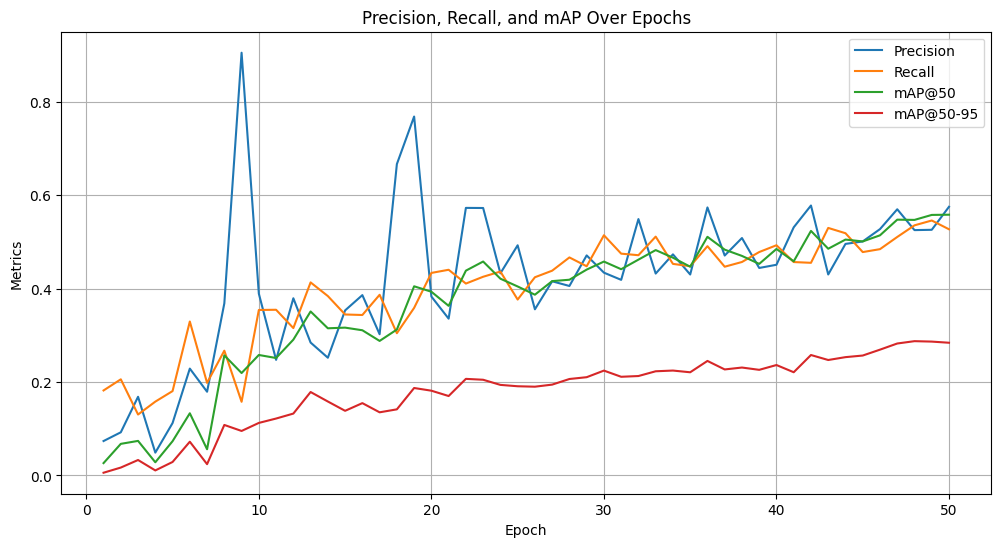

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(results['epoch'], results['metrics/precision(B)'], label='Precision')
plt.plot(results['epoch'], results['metrics/recall(B)'], label='Recall')
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@50')
plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP@50-95')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Precision, Recall, and mAP Over Epochs')
plt.legend()
plt.grid()
plt.show()

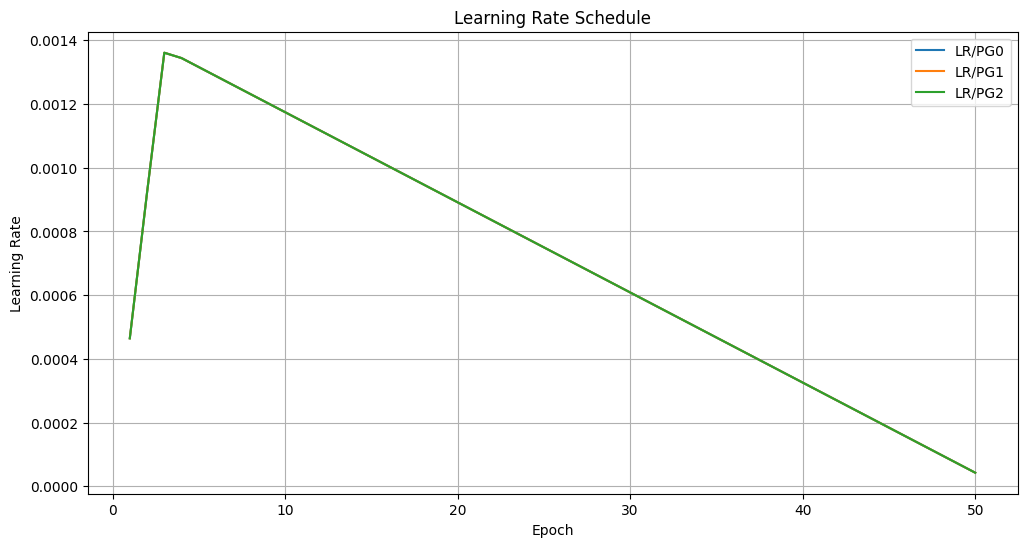

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(results['epoch'], results['lr/pg0'], label='LR/PG0')
plt.plot(results['epoch'], results['lr/pg1'], label='LR/PG1')
plt.plot(results['epoch'], results['lr/pg2'], label='LR/PG2')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()
plt.grid()
plt.show()